In [2]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools

## Lost slots calculations and plots

Mean lost theatre slots per day and per week

In [105]:
number_of_runs = 50
warm_up_period = 34
primary_pt_results = pd.read_csv('data/primary_patient_results.csv')
revision_pt_results = pd.read_csv('data/revision_patient_results.csv')

In [32]:
def calc_lost_theatre_slots(primary_pt_results, revision_pt_results):
    """
    Join pt dataframes into single df
    Select columns for lost slots
    Summarise by day across runs
    Deal with 0-day arrivals
    Save to csv
    Return lost_slots_df
    """
    #join dfs, select columns, group by day and weekday across runs
    pt_results = pd.concat([primary_pt_results, revision_pt_results])
    lost_slots_df = pt_results[["Day", "lost slots", "weekday"]]
    lost_slots_df = pd.DataFrame(lost_slots_df.groupby(['Day', 'weekday'])['lost slots'].sum().astype(int))
    
    #divide by number of runs
    lost_slots_df = lost_slots_df.assign(DayLostSlots = lambda x: (x['lost slots'] / number_of_runs))
    lost_slots_df = pd.DataFrame(lost_slots_df["DayLostSlots"]).reset_index()
    
    
    
    #0-arrival days excluded from df - add to Days sequence and fill lost slots value with 0 lost slots
    # re-index as dataframe length increasing. Fill values in columns with 0.
    lost_slots_df = (lost_slots_df.set_index('Day')
     .reindex(range(lost_slots_df.Day.iat[0],lost_slots_df.Day.iat[-1]+1), fill_value=0)
     .reset_index())
    #change 0 weekdays into correct weekday integer
    #need days of week seq and length of total range > length of dataframe
    shortseq = np.arange(len(range(0,7)))
    length = math.ceil(len(lost_slots_df) / 7)
    #create total sequence and flatten array list into list of elements
    sequence = ([np.tile((shortseq),length)])
    flat_seq = list(itertools.chain(*sequence))
    #truncate to correct length and save to column
    sequence = flat_seq[:len(lost_slots_df)]
    lost_slots_df['weekday'] = sequence
    lost_slots_df.to_csv('data_summaries/Lost_slots_results_per_day.csv')
    return(pd.DataFrame(lost_slots_df))


lost_slots_df = calc_lost_theatre_slots(primary_pt_results, revision_pt_results)
lost_slots_df.head(10)

,Day,weekday,DayLostSlots
0,0,0,0.0
1,1,1,0.0
2,2,2,0.0
3,3,3,7.4
4,4,4,33.0
5,5,5,0.0
6,6,6,0.0
7,7,0,0.0
8,8,1,1.9
9,9,2,22.1


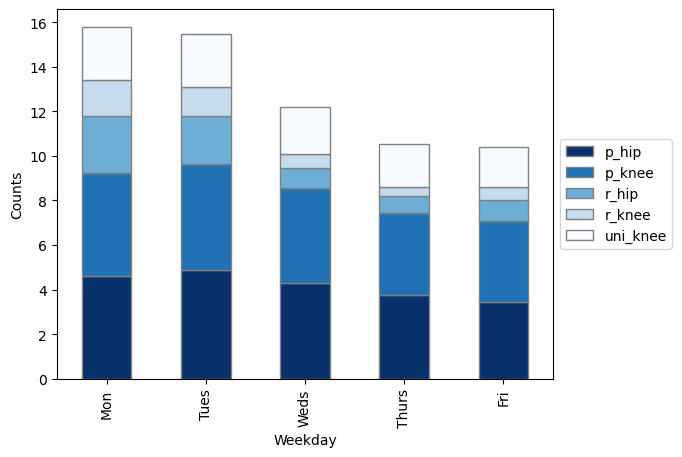

In [162]:

#throughput - remove patients who arrived but didn't stay

pt_results = pd.concat([primary_pt_results, revision_pt_results])


thruput_df = pt_results[pt_results['lost slots'] == False]

thruput_df = thruput_df[thruput_df["Day"] > warm_up_period]

thruput_df = thruput_df[["Day","weekday","surgery type", "depart"]]

thruput_df = pd.DataFrame(thruput_df.groupby(['Day','weekday','surgery type'])['surgery type'].count())

thruput_df.rename(columns = {'surgery type':'Counts'}, inplace = True)
thruput_df = thruput_df.reset_index()
thruput_df = thruput_df.assign(Counts = lambda x: (x['Counts'] / number_of_runs))

thruput_df = pd.DataFrame(thruput_df.groupby(['weekday','surgery type'])['Counts'].mean())
thruput_df.head(40)
#################################
thruput_df = thruput_df.reset_index()
day_map = {0: 'Mon', 1: 'Tues', 2: 'Weds', 3: 'Thurs', 4: 'Fri'}
thruput_df['weekday'] = thruput_df['weekday'].map(day_map)


fig, ax = plt.subplots()
df_pivot = thruput_df.pivot(index='weekday', columns='surgery type', values='Counts').loc[day_map.values()]
df_pivot.plot.bar(stacked=True, colormap='Blues_r', edgecolor='grey', ax=ax)
ax.set_xlabel('Weekday')
ax.set_ylabel('Counts')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



In [ ]:

thruput_df = (thruput_df.set_index('Day')
     .reindex(range(lost_slots_df.Day.iat[0],lost_slots_df.Day.iat[-1]+1), fill_value=0)
     .reset_index())
    #change 0 weekdays into correct weekday integer
    #need days of week seq and length of total range > length of dataframe
shortseq = np.arange(len(range(0,7)))
length = math.ceil(len(lost_slots_df) / 7)
    #create total sequence and flatten array list into list of elements
sequence = ([np.tile((shortseq),length)])
flat_seq = list(itertools.chain(*sequence))
    #truncate to correct length and save to column
sequence = flat_seq[:len(thruput_df)]
thruput_df['weekday'] = sequence







print(thruput_df.head())




In [28]:
# pt_results = pd.concat([primary_pt_results, revision_pt_results])
# lost_slots_df = pt_results[["Day", "lost slots", "weekday"]]
# lost_slots_df = pd.DataFrame(lost_slots_df.groupby(['Day', 'weekday'])['lost slots'].sum().astype(int))
# lost_slots_df = lost_slots_df.assign(DayLostSlots = lambda x: (x['lost slots'] / number_of_runs))
# lost_slots_df = pd.DataFrame(lost_slots_df["DayLostSlots"]).reset_index()
# #0-arrival days excluded from df - add to Days sequence and fill lost slots value with 0 lost slots
# # re-index as dataframe length increasing. Fill values in columns with 0.
# lost_slots_df = (lost_slots_df.set_index('Day')
#  .reindex(range(lost_slots_df.Day.iat[0],lost_slots_df.Day.iat[-1]+1), fill_value=0)
#  .reset_index())
# #change 0 weekdays into correct weekday integer
# #need days of week seq and length of total range > length of dataframe
# shortseq = np.arange(len(range(0,7)))
# length = math.ceil(len(lost_slots_df) / 7)
# #create total sequence and flatten array list into list of elements
# sequence = ([np.tile((shortseq),length)])
# flat_seq = list(itertools.chain(*sequence))
# #truncate to correct length and save to column
# sequence = flat_seq[:len(lost_slots_df)]
# lost_slots_df['weekday'] = sequence
# lost_slots_df.to_csv('data_summaries/Lost_slots_results_per_day.csv')
   

In [29]:
lost_slots_df.head()

,Day,weekday,DayLostSlots
0,0,0,0.0
1,1,1,0.0
2,2,2,0.0
3,3,3,7.4
4,4,4,33.0


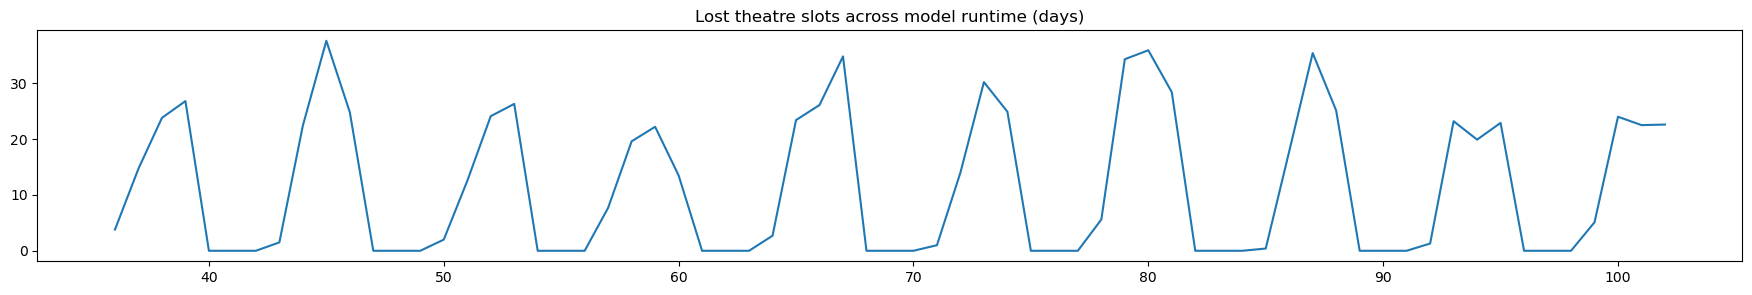

In [33]:
def plot_lost_slots_per_day(lost_slots_df):
    """
    Remove warm-up period results
    Plot lost slots per day
    """
    lost_slots_df = lost_slots_df[lost_slots_df["Day"] > warm_up_period]
    fig, ax = plt.subplots(figsize=(22,3))
    ax.plot(lost_slots_df['DayLostSlots'])
    ax.set_title('Lost theatre slots across model runtime (days)')
    return(fig)
    

plot_lost_slots_per_day(lost_slots_df);

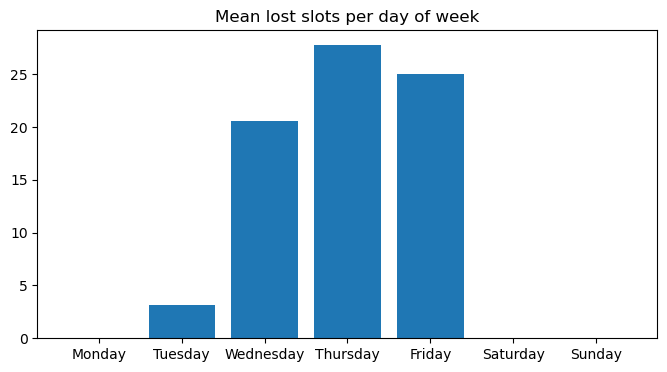

In [34]:
def plot_lost_slots_per_week(lost_slots_df):
    """
    Remove warm-up period results
    Group by week
    plot
    """
    lost_slots_df = lost_slots_df[lost_slots_df["Day"] > warm_up_period]    
    lost_slots_wk_plot = lost_slots_df.groupby('weekday').mean()
    lost_slots_wk_plot.reset_index()
    values = lost_slots_wk_plot['DayLostSlots']
    names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    fig, ax = plt.subplots(figsize=(8,4))
    ax.bar(names, values)
    ax.set_title('Mean lost slots per day of week')
    return(fig)

plot_lost_slots_per_week(lost_slots_df);


In [35]:
number_of_runs = 100

#read in dataframes and concatenate
primary_pt_results = pd.read_csv('data/primary_patient_results.csv')
revision_pt_results = pd.read_csv('data/revision_patient_results.csv')
pt_results = pd.concat([primary_pt_results, revision_pt_results])
print(len(pt_results))

59700


In [36]:
pt_results.tail()

,Unnamed: 0,Day,weekday,ID,arrival time,patient class,surgery type,lost slots,queue time,los,delayed discharge,depart
15295,301,101,3,302,101,revision,r_hip,True,0.744085,0.00000,False,101.744085
15296,302,102,4,303,102,revision,r_hip,False,0.753821,8.07955,False,-inf
15297,303,102,4,304,102,revision,r_knee,True,0.776271,0.00000,False,102.776271
15298,304,102,4,305,102,revision,r_hip,True,0.915446,0.00000,False,102.915446
15299,305,102,4,306,102,revision,r_hip,True,0.596075,0.00000,False,102.596075


In [37]:
#double check
pt_results['patient class'].value_counts()

primary     44400
revision    15300
Name: patient class, dtype: int64

In [38]:
#summarise lost slots by day across runs
lost_slots_df = pt_results[["Day", "lost slots", "weekday"]]

lost_slots_df = pd.DataFrame(lost_slots_df.groupby(['Day', 'weekday'])['lost slots'].sum().astype(int))
lost_slots_df = lost_slots_df.assign(DayLostSlots = lambda x: (x['lost slots'] / number_of_runs))

lost_slots_df = pd.DataFrame(lost_slots_df["DayLostSlots"]).reset_index()
print(len(lost_slots_df))

75


In [39]:
#Day and weekdays with 0-arrivals are lost (ie 5 and 6 = sat and sun)
lost_slots_df.head(10)

,Day,weekday,DayLostSlots
0,0,0,0.00
1,1,1,0.00
2,2,2,0.00
3,3,3,0.74
4,4,4,3.30
5,7,0,0.00
6,8,1,0.19
7,9,2,2.21
8,10,3,2.82
9,11,4,3.19


In [40]:
#0-arrival days excluded from df - add to Days sequence and fill lost slots value with 0 lost slots
# use re-index as dataframe length increasing. Fill values in columns with 0.

lost_slots_df = (lost_slots_df.set_index('Day')
 .reindex(range(lost_slots_df.Day.iat[0],lost_slots_df.Day.iat[-1]+1), fill_value=0)
 .reset_index())

In [41]:
#change 0 weekdays into correct weekday integer

#need days of week seq and length of total range > length of dataframe
shortseq = np.arange(len(range(0,7)))
length = math.ceil(len(lost_slots_df) / 7)

#create total sequence and flatten array list into list of elements
sequence = ([np.tile((shortseq),length)])
flat_seq = list(itertools.chain(*sequence))

#truncate to correct length and save to column
sequence = flat_seq[:len(lost_slots_df)]
lost_slots_df['weekday'] = sequence


In [42]:
#save to csv - note warm-up period included in results

lost_slots_df.to_csv('data_summaries/Lost_slots_results_per_day.csv')

Text(0.5, 1.0, 'Lost theatre slots across model runtime')

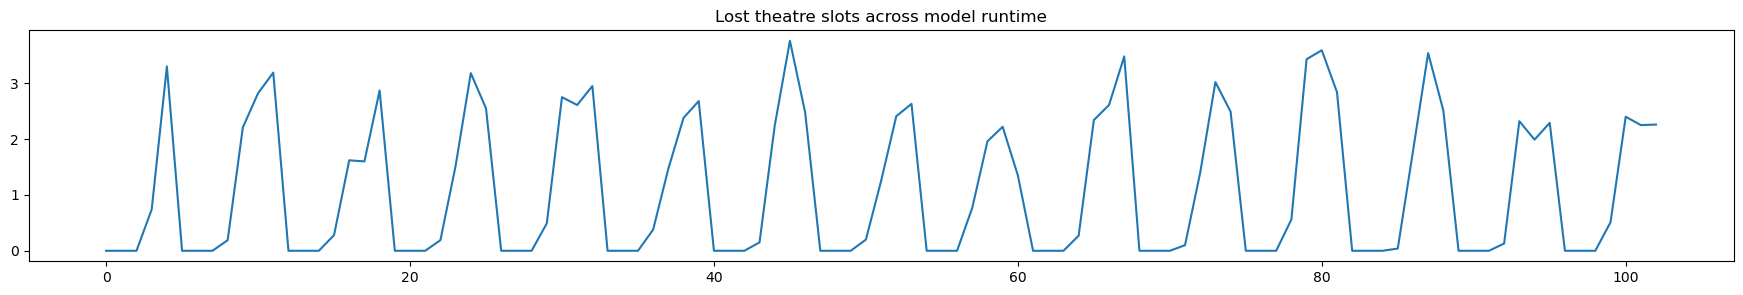

In [43]:
# plot per day - need to remove warm-up period
fig = plt.figure(figsize=(22,3))
ax = fig.add_subplot()

lost_slots_plot = ax.plot(lost_slots_df['DayLostSlots'])
ax.set_title('Lost theatre slots across model runtime')

In [44]:
# plot daily summary of lost slots
lost_slots_wk_plot = lost_slots_df.groupby('weekday').mean()
lost_slots_wk_plot.reset_index()
lost_slots_wk_plot

,Day,DayLostSlots
weekday,,
0,49.0,0.000000
1,50.0,0.284000
2,51.0,1.912667
3,52.0,2.581333
4,53.0,2.658000
5,50.5,0.000000
6,51.5,0.000000


In [45]:
#lost_slots_wk_plot = lost_slots_wk_plot['DayLostSlots']#, 'DayLostSlots']]

Text(0.5, 1.0, 'Lost slots per day of week')

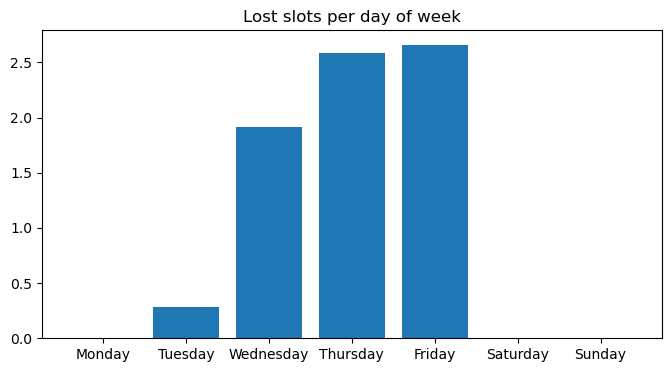

In [46]:
values = lost_slots_wk_plot['DayLostSlots']
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
lost_slots_df = ax.bar(names, values)
#m_day_wd_plot = ax.plot(m_day_results_wd['bed_utilisation'] )
ax.set_title('Lost slots per day of week')
#plt.savefig('Bed Utilisation example output')

In [1]:
scenarios = {}
scenarios['base'] = Scenario(schedule)
    
# define scenarios
scenarios['beds+20'] = Scenario(schedule, n_beds=scenarios['base'].n_beds+20)
    
#scenarios['theatres+4'] = Scenario(n_theatres=scenarios['base'].n_theatres + 4)
    
reduction = 20 
primary_hip_mean_los = scenarios['base'].primary_hip_mean_los + reduction
revision_hip_mean_los = scenarios['base'].revision_hip_mean_los + reduction
revision_knee_mean_los = scenarios['base'].revision_knee_mean_los + reduction
primary_knee_mean_los = scenarios['base'].primary_knee_mean_los + reduction
unicompart_knee_mean_los = scenarios['base'].unicompart_knee_mean_los + reduction
scenarios[f'los+{reduction}'] = Scenario(schedule,primary_hip_mean_los=primary_hip_mean_los,
                                            revision_hip_mean_los=revision_hip_mean_los,
                                            revision_knee_mean_los=revision_knee_mean_los,
                                            primary_knee_mean_los=primary_knee_mean_los,
                                            unicompart_knee_mean_los=unicompart_knee_mean_los)

    
new_delay_prob = 0
scenarios['Proportion_delayed'] = Scenario(schedule,prob_ward_delay = new_delay_prob)

print(scenarios)

NameError: name 'Scenario' is not defined

In [5]:
new_scenario = pd.DataFrame({
        'Scenario': ['s1', 's2', 's3'],
        'n_beds': [1,2,4],
        'Primary_hip_los': [2,4,6],
        'Primary_knee_los': [3,6,9],
        'Revision_hip_los': [1,3,5],
        'Revision_knee_los': [3,4,5],
        'Unicompart_knee_los': [1,2,4],
        'Delay_mean': [6,7,8],
        'Delay_prop': [0.5,0.6,0.7]
    })

new_scenario

,Scenario,n_beds,Primary_hip_los,Primary_knee_los,Revision_hip_los,Revision_knee_los,Unicompart_knee_los,Delay_mean,Delay_prop
0,s1,1,2,3,1,3,1,6,0.5
1,s2,2,4,6,3,4,2,7,0.6
2,s3,4,6,9,5,5,4,8,0.7


In [29]:
scenario_dict = {}
for i, row in new_scenario.iterrows():
    key = row['Scenario']
    value = [{'n_beds': row['n_beds']},
             {'Primary_hip_los': row['Primary_hip_los']},
             {'Primary_knee_los': row['Primary_knee_los']},
             {'Revision_hip_los': row['Revision_hip_los']},
             {'Revision_knee_los': row['Revision_knee_los']},
             {'Unicompart_knee_los': row['Unicompart_knee_los']},
             {'Delay_mean': row['Delay_mean']},
             {'Delay_prop': row['Delay_prop']}]
    scenario_dict[key] = value

scenario_dict

{'s1': [{'n_beds': 1},
  {'Primary_hip_los': 2},
  {'Primary_knee_los': 3},
  {'Revision_hip_los': 1},
  {'Revision_knee_los': 3},
  {'Unicompart_knee_los': 1},
  {'Delay_mean': 6},
  {'Delay_prop': 0.5}],
 's2': [{'n_beds': 2},
  {'Primary_hip_los': 4},
  {'Primary_knee_los': 6},
  {'Revision_hip_los': 3},
  {'Revision_knee_los': 4},
  {'Unicompart_knee_los': 2},
  {'Delay_mean': 7},
  {'Delay_prop': 0.6}],
 's3': [{'n_beds': 4},
  {'Primary_hip_los': 6},
  {'Primary_knee_los': 9},
  {'Revision_hip_los': 5},
  {'Revision_knee_los': 5},
  {'Unicompart_knee_los': 4},
  {'Delay_mean': 8},
  {'Delay_prop': 0.7}]}

In [21]:
for index, row in scenarios.iterrows():
    list_names = {}
    list_names = ['d_n_bed', 'd_primary_hip_los', 'd_primary_knee_los', 'd_revision_hip_los', 
            'd_revision_knee_los', 'd_unicompart_knee_los', 'd_delay_mean', 'd_delay_prop']
    values['Scenario'] =  [f"{list_name}={item}" for list_name, item in zip(list_names, row)]

print(values)

TypeError: list indices must be integers or slices, not str

In [ ]:
	for index, row in df.iterrows():
	    
		scenarios['index'] = [args.n_beds='n_beds', args.primary_hip_mean_los='Primary_hip_los', args.primary_knee_mean_los='Primary_knee_los', 
			args.revision_hip_mean_los='Revision_hip_los', args.revision_knee_mean_los='Revision_knee_los', 
			args.unicompart_knee_mean_los='Unicompart_knee_los', args.delay_post_los_mean='Delay_mean', args.prob_ward_delay='Delay_prop']
			    
	return(scenarios)